In [1]:
from sklearn.datasets import load_digits

In [2]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling   # will need to install at CLI
import seaborn as sb

# SKLearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.datasets import load_digits

# helpers
%matplotlib inline

# Grahpviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

C:\anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [7]:
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

In [8]:
dataset = 'Demographic_Data.csv'
data=pd.read_csv(dataset,header=0)
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


<AxesSubplot:>

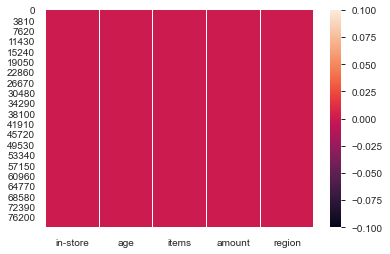

In [9]:
data.info()
sb.heatmap(data.isnull())

In [10]:
dataframe = data

In [11]:
variable_name = dataframe.iloc[[0, 2, 3, 4]]

In [12]:
#AMOUNT
variable_name = dataframe.iloc[[0, 1, 2, 4]]

In [13]:
#features
X = data.iloc[:,[0,2,3,4]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [14]:
#features--dropping "AMOUNT" since this will be my dependent value 
X = data.iloc[:,[0,1,2,4]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,region
0,0,37,4,2
1,0,35,2,2
2,1,45,3,4
3,1,46,3,3
4,1,33,4,1


In [15]:
# Separating features from the target variable (Age)
X_data = data.drop('age', axis=1)

In [16]:
# Separating features from the target variable (Amount)
X_data = data.drop('amount', axis=1)

In [17]:
# Discretize age using 3 bins (18-29, 30-59, 60-85) & set as Target Variable
y_data = pd.cut(data['age'], bins=[15,29,59,85], labels=False)
y_data.value_counts()

1    50104
2    16254
0    13642
Name: age, dtype: int64

In [18]:
# Discretize amount using 3 bins (0-1000, 1001-2000, 2001-3000) & set as Target Variable (dependent)
y_data = pd.cut(data['amount'], bins=[0,1000,2000,3000], labels=['0-1000', '1001-2000', '2001-3000']) 
y_data.value_counts()

0-1000       55986
1001-2000    17263
2001-3000     6751
Name: amount, dtype: int64

In [19]:
# Discretize Age into 3 bins and add it to the data frame
data['age'] = pd.cut(data['age'], bins=[18,29,59,85], labels=['<30', '30-59', '60-85'])
data.head()

,in-store,age,items,amount,region
0,0,30-59,4,281.03,2
1,0,30-59,2,219.51,2
2,1,30-59,3,1525.70,4
3,1,30-59,3,715.25,3
4,1,30-59,4,1937.50,1


In [20]:
# Discretize amount into 3 bins and add it to the data frame
data['amount'] = pd.cut(data['amount'], bins=[0,1000,2000,3000], labels=['0-1000', '1001-2000', '2001-3000'])
data.head(10)

,in-store,age,items,amount,region
0,0,30-59,4,0-1000,2
1,0,30-59,2,0-1000,2
2,1,30-59,3,1001-2000,4
3,1,30-59,3,0-1000,3
4,1,30-59,4,1001-2000,1
5,0,<30,3,1001-2000,4
6,0,30-59,6,0-1000,2
7,1,60-85,5,0-1000,3
8,1,30-59,5,0-1000,1
9,1,30-59,3,0-1000,1


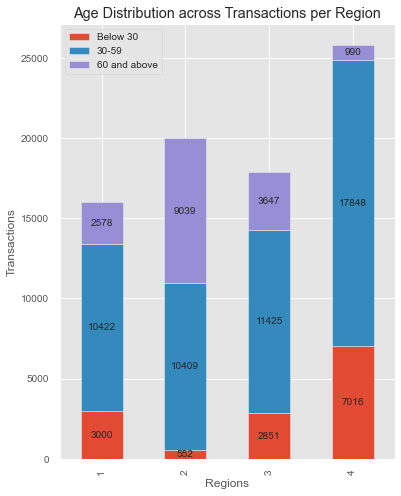

In [22]:
# create stacked plots for age category per region and transactions using the discretized age dataset
plt.style.use('ggplot')
data_stack_plot = data.groupby(['region', 'age'])['region'].count().unstack('age')
ax = data_stack_plot.plot(kind = 'bar',
                             stacked = True,
                             title = 'Age Distribution across Transactions per Region',
                             figsize = (6, 8))

ax.set_xlabel('Regions')
ax.set_ylabel('Transactions')

#annotate the patches with the counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    px, py = p.get_x(), p.get_y()
    ax.text(px+width/2,
            py+height/2,
            int(height),
            horizontalalignment='center',
            verticalalignment='center')
plt.legend(['Below 30', '30-59', '60 and above'])

In [74]:
#Train/Test Split # Split the dataset into 70% Training and 30% Test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .30, random_state = 123)

In [102]:
#Train/Test Split for Amount Desicion tree
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .30, random_state = 123)

In [75]:
X_train.head()

,in-store,items,amount,region
25183,1,4,700.19,4
37715,1,3,825.29,4
38347,0,5,315.27,2
4589,1,4,1923.90,1
78269,0,3,2503.80,3


In [103]:
#for amount decision tree
X_train.head()

,in-store,age,items,region
25183,1,27,4,4
37715,1,44,3,4
38347,0,50,5,2
4589,1,20,4,1
78269,0,35,3,3


In [104]:
#for amount decision tree
y_data.head()

0       0-1000
1       0-1000
2    1001-2000
3       0-1000
4    1001-2000
Name: amount, dtype: category
Categories (3, object): [0-1000 < 1001-2000 < 2001-3000]

In [76]:
y_train.head()

25183    0
37715    1
38347    1
4589     0
78269    1
Name: age, dtype: int64

In [105]:
#for amount decision tree
y_train.head()

25183       0-1000
37715       0-1000
38347       0-1000
4589     1001-2000
78269    2001-3000
Name: amount, dtype: category
Categories (3, object): [0-1000 < 1001-2000 < 2001-3000]

In [77]:
algo = DecisionTreeClassifier(max_depth=3)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [106]:
#AMOUNT DESISION TREE
algo = DecisionTreeClassifier(max_depth=3)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [78]:
#Predictions
preds = model.predict(X_test)

In [107]:
#Predictions for AMOUNT
preds = model.predict(X_test)

In [79]:
preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [108]:
#For AMOUNT
preds

array(['0-1000', '1001-2000', '0-1000', ..., '0-1000', '0-1000', '0-1000'],
      dtype=object)

### Decision Tree classifier - Age

In [80]:
accuracy_score(preds, y_test)

0.6272083333333334

In [81]:
# Using simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.6270833333333333

In [82]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[    4,  4101,     0],
       [    8, 15045,     2],
       [    0,  4839,     1]], dtype=int64)

### Random Forest Classifer - Age

In [93]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.5067083333333333

### Gradient Boosting Classifier - Age

In [84]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.6266666666666667

#### Tuning the Classifer for Gradient Boosting - Age

In [90]:
# Tune Gradient booster.
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.627

### Decision Tree Classifier - Amount

In [109]:
#For AMOUNT
accuracy_score(preds, y_test)

0.7089583333333334

In [110]:
# Using simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7100833333333333

In [111]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14137,  2304,   299],
       [ 2309,  2593,   324],
       [  422,  1300,   312]], dtype=int64)

In [133]:
print(dt_clf.fit(X_train, y_train))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


### Random Forest Classifier - Amount

In [114]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7056666666666667

In [132]:
print(rf_clf.fit(X_train, y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


### Gradient Boosting Classifier - Amount

In [128]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.7080833333333333

In [131]:
print(gb_clf.fit(X_train, y_train))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Tuning the Classifer for Gradient Boosting - Amount

In [122]:
#Tune Gradient Booster
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.70975

In [86]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4105
           1       0.63      1.00      0.77     15055
           2       0.00      0.00      0.00      4840

    accuracy                           0.63     24000
   macro avg       0.21      0.33      0.26     24000
weighted avg       0.39      0.63      0.48     24000



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
#FOR AMOUNT
print(classification_report(y_test, preds))

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      0-1000       0.82      0.84      0.83     16740
   1001-2000       0.42      0.56      0.48      5226
   2001-3000       0.00      0.00      0.00      2034

    accuracy                           0.71     24000
   macro avg       0.42      0.47      0.44     24000
weighted avg       0.67      0.71      0.69     24000



In [87]:
# View the Decision Tree using graphviz
age_values = ['<30', '30-59', '60-85']

In [124]:
# AMOUNT - View the Decision Tree using graphviz
amount_values = ['0-1000', '1001-2000', '2001-3000']

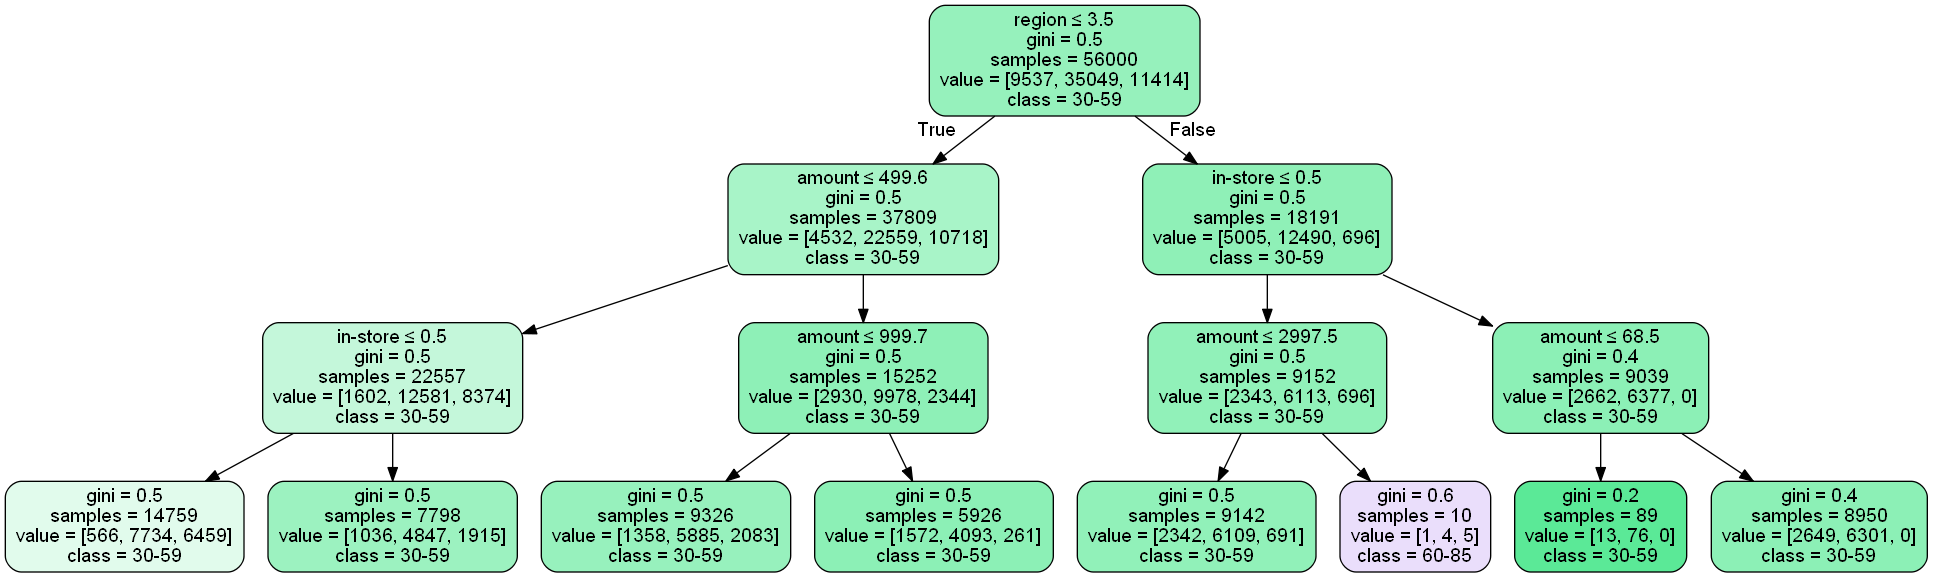

In [88]:
# Decision Tree for AGE
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
    filled=True, rounded=True,
    feature_names=X.columns, 
    class_names=age_values,label='all',precision=1,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

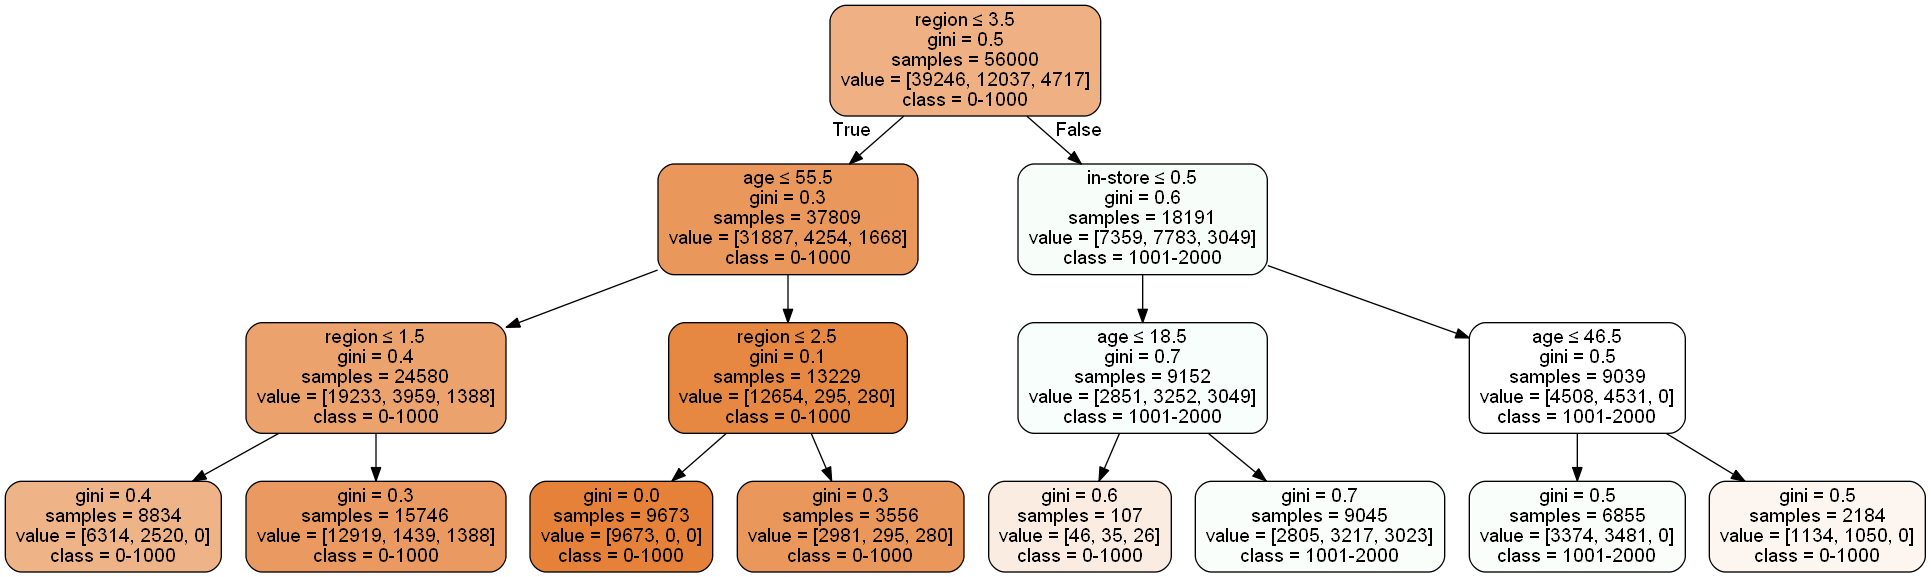

In [125]:
# Decision Tree for AMOUNT

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
    filled=True, rounded=True,
    feature_names=X.columns, 
    class_names=amount_values,label='all',precision=1,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## Random Forest for Classification

### Imports

### Import dataset

### Preparing data for Training

### Feature Scaling

### Training the Algorithm

### Cross Validation Method

#### Accuracy for Age

In [23]:
from sklearn.model_selection import cross_val_score

In [52]:
result = cross_val_score(model, X,y_data, cv=3, scoring='accuracy')

In [54]:
print(cross_val_score(model, X, y_data, cv=3))

[0.62631717 0.62627967 0.62622816]


In [55]:
print('Accuracy is: %.3f' % result.mean())

Accuracy is: 0.626


In [56]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [58]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y_data, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [59]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5079624454705566
Decision Tree Classifier 0.5058749481261876


#### Accuracy for Amount

In [47]:
from sklearn.model_selection import cross_val_score

In [39]:
result = cross_val_score(model, X,y_data, cv=3, scoring='accuracy')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]:

In [25]:
print(cross_val_score(model, X, y_data, cv=3))

[0.70799115 0.70904114 0.70494262]


In [26]:
print('Accuracy is: %.3f' % result.mean())

Accuracy is: 0.707


In [27]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [28]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y_data, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [29]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.704175034907991
Decision Tree Classifier 0.7045625235017194
